### Integrantes:
- José Antonio Miranda Baños

- Fernando Josué Matute Soto

- Paolo Alfonso Reyes Ramírez

- Ricardo Navarro Gómez

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [160]:
# Antecendents
x = ctrl.Antecedent(np.arange(0, 20.01, 0.01), 'distance')
phi = ctrl.Antecedent(np.arange(-90, 270.01, 0.01), 'angle')

# Consequent
theta = ctrl.Consequent(np.arange(-40, 40.01, 0.01), 'steering_angle')

In [161]:
x['lefter'] = fuzz.gaussmf(x.universe, 0, 2)
x['left'] = fuzz.gaussmf(x.universe, 5, 2)
x['center'] = fuzz.gaussmf(x.universe, 10, 2)
x['right'] = fuzz.gaussmf(x.universe, 15, 2)
x['righter'] = fuzz.gaussmf(x.universe, 20, 2)

phi['l_horizontal'] = fuzz.gaussmf(phi.universe, 180, 20)
phi['l_diagonal'] = fuzz.gaussmf(phi.universe, 135, 20)
phi['perpendicular'] = fuzz.gaussmf(phi.universe, 90, 20)
phi['r_diagonal'] = fuzz.gaussmf(phi.universe, 45, 20)
phi['r_horizontal'] = fuzz.gaussmf(phi.universe, 0, 20)

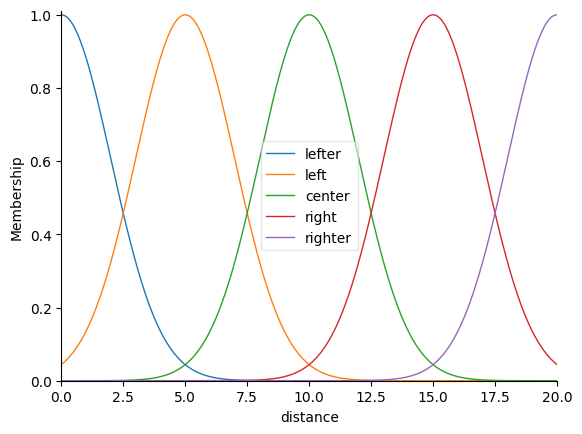

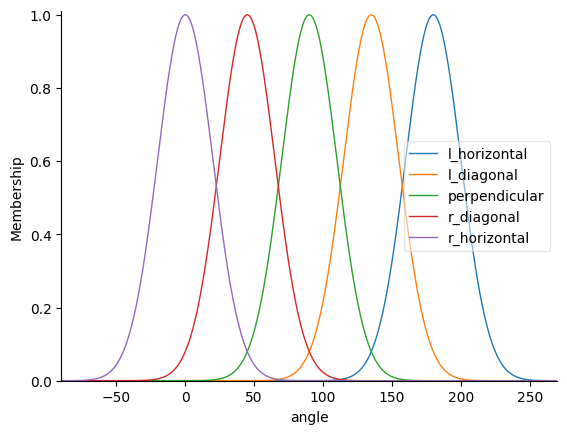

In [162]:
x.view()
phi.view()

In [174]:
ds = 5
theta['LEFT'] = fuzz.gaussmf(theta.universe, 35, ds)
theta['lEFT'] = fuzz.gaussmf(theta.universe, 26.1, ds)
theta['leFT'] = fuzz.gaussmf(theta.universe, 17.2, ds)
theta['lefT'] = fuzz.gaussmf(theta.universe, 8.3, ds)
theta['center'] = fuzz.gaussmf(theta.universe, 0, ds)
theta['RIght'] = fuzz.gaussmf(theta.universe, -12.3, ds)
theta['RIGht'] = fuzz.gaussmf(theta.universe, -21.2, ds)
theta['RIGHt'] = fuzz.gaussmf(theta.universe, -28.1, ds)
theta['RIGHT'] = fuzz.gaussmf(theta.universe, -35, ds)

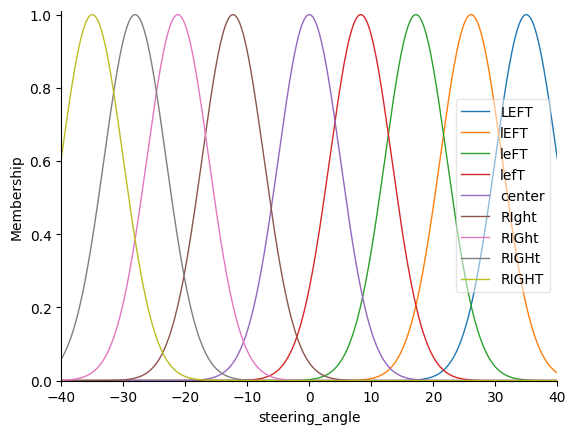

In [175]:
theta.view()

### Rules
1. If lefter AND r_horizontal, THEN RIGht
2. If lefter AND r_diagonal, THEN center
3. If lefter AND perpendicular, THEN leFT

4. If left AND r_horizontal, THEN RIGHt
5. If left AND r_diagonal, THEN RIght
6. If left AND perpendicular, leFT

7. If center AND r_horizontal, THEN RIGHT
8. If center AND r_diagonal, THEN RIGHt
9. If center AND perpendicular, THEN center


In [176]:
rule1 = ctrl.Rule(x['lefter'] & phi['r_horizontal'], theta['RIGht'])
rule2 = ctrl.Rule(x['lefter'] & phi['r_diagonal'], theta['center'])
rule3 = ctrl.Rule(x['lefter'] & phi['perpendicular'], theta['leFT'])

rule4 = ctrl.Rule(x['left'] & phi['r_horizontal'], theta['RIGHt'])
rule5 = ctrl.Rule(x['left'] & phi['r_diagonal'], theta['RIght'])
rule6 = ctrl.Rule(x['left'] & phi['perpendicular'], theta['leFT'])

rule7 = ctrl.Rule(x['center'] & phi['r_horizontal'], theta['RIGHT'])
rule8 = ctrl.Rule(x['center'] & phi['r_diagonal'], theta['RIGHt'])
rule9 = ctrl.Rule(x['center'] & phi['perpendicular'], theta['center'])

theta_inference = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
theta_fis = ctrl.ControlSystemSimulation(theta_inference)

In [178]:
data = np.array([[  0.  ,   1.  ,   0.  , -19.  ],
       [  1.  ,   1.95,   9.37, -17.95],
       [  2.  ,   2.88,  18.23, -16.9 ],
       [  3.  ,   3.79,  26.59, -15.85],
       [  4.  ,   4.65,  34.44, -14.8 ],
       [  5.  ,   5.45,  41.78, -13.75],
       [  6.  ,   6.18,  48.6 , -12.7 ],
       [  7.  ,   7.48,  54.91, -11.65],
       [  8.  ,   7.99,  60.71, -10.6 ],
       [  9.  ,   8.72,  65.99,  -9.55],
       [ 10.  ,   9.01,  70.75,  -8.5 ],
       [ 11.  ,   9.28,  74.98,  -7.45],
       [ 12.  ,   9.46,  78.7 ,  -6.4 ],
       [ 13.  ,   9.59,  81.9 ,  -5.34],
       [ 14.  ,   9.72,  84.57,  -4.3 ],
       [ 15.  ,   9.81,  86.72,  -3.25],
       [ 16.  ,   9.88,  88.34,  -2.2 ],
       [ 17.  ,   9.91,  89.44,   0.  ]])
data

array([[  0.  ,   1.  ,   0.  , -19.  ],
       [  1.  ,   1.95,   9.37, -17.95],
       [  2.  ,   2.88,  18.23, -16.9 ],
       [  3.  ,   3.79,  26.59, -15.85],
       [  4.  ,   4.65,  34.44, -14.8 ],
       [  5.  ,   5.45,  41.78, -13.75],
       [  6.  ,   6.18,  48.6 , -12.7 ],
       [  7.  ,   7.48,  54.91, -11.65],
       [  8.  ,   7.99,  60.71, -10.6 ],
       [  9.  ,   8.72,  65.99,  -9.55],
       [ 10.  ,   9.01,  70.75,  -8.5 ],
       [ 11.  ,   9.28,  74.98,  -7.45],
       [ 12.  ,   9.46,  78.7 ,  -6.4 ],
       [ 13.  ,   9.59,  81.9 ,  -5.34],
       [ 14.  ,   9.72,  84.57,  -4.3 ],
       [ 15.  ,   9.81,  86.72,  -3.25],
       [ 16.  ,   9.88,  88.34,  -2.2 ],
       [ 17.  ,   9.91,  89.44,   0.  ]])

In [179]:
real_value_list = [dato[-1] for dato in data]
print(real_value_list)
predicted_value_list=[]

[-19.0, -17.95, -16.9, -15.85, -14.8, -13.75, -12.7, -11.65, -10.6, -9.55, -8.5, -7.45, -6.4, -5.34, -4.3, -3.25, -2.2, 0.0]


In [180]:
for dato in data:
  theta_fis.inputs({'distance': dato[1], 'angle': dato[2]})
  theta_fis.compute()
  predicted_value_list.append(theta_fis.output['steering_angle'])

for i, predicted_value in enumerate(predicted_value_list):
 print(f'Valor original {real_value_list[i]}, Predict: {predicted_value} ')

Valor original -19.0, Predict: -19.30151712269368 
Valor original -17.95, Predict: -17.121630855473132 
Valor original -16.9, Predict: -15.639000608841577 
Valor original -15.85, Predict: -15.894118560386962 
Valor original -14.8, Predict: -14.392872424716181 
Valor original -13.75, Predict: -11.483022072077402 
Valor original -12.7, Predict: -9.65410176768104 
Valor original -11.65, Predict: -10.121545620356832 
Valor original -10.6, Predict: -8.42997314896901 
Valor original -9.55, Predict: -9.87919288467768 
Valor original -8.5, Predict: -8.66291428635454 
Valor original -7.45, Predict: -7.390830734733301 
Valor original -6.4, Predict: -6.0748239102437545 
Valor original -5.34, Predict: -4.915701803185293 
Valor original -4.3, Predict: -4.0273978305695755 
Valor original -3.25, Predict: -3.325989062171009 
Valor original -2.2, Predict: -2.8292737044465635 
Valor original 0.0, Predict: -2.483240903382649 


In [181]:
def get_RMSE(real_values_list, predicted_value_list):
        return(np.square(np.subtract(real_values_list, predicted_value_list)).mean())

In [182]:
error = get_RMSE(real_value_list, predicted_value_list)
print(error)

1.7257520340177384
